In [35]:
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
def cut_swans(swan_id, total_swans_num, description_df, data_folders, output_path):
    images_path = './data/' + data_folders[swan_id] + '/images/'
    masks_path = './data/' + data_folders[swan_id] + '/masks/'

    images = [f for f in sorted(listdir(images_path))]
    masks = [f for f in sorted(listdir(masks_path))]
    treshold = 20 #treshold for min size
    for image_name, mask_name in tqdm(zip(images, masks)):
        #print(image_path, masks_path)
        img = cv2.imread(images_path + image_name)
        mask = cv2.imread(masks_path +mask_name,cv2.IMREAD_GRAYSCALE)
        if(img.shape[0] != mask.shape[0] and img.shape[1] != mask.shape[1]): #skipping mismatching data
            continue
        swans_intensities = np.unique(mask)
        swans_intensities = swans_intensities[swans_intensities != 0]
        for itensity in swans_intensities:

            ids = np.where(mask == itensity)
            
            min_row, max_row = np.min(ids[0]) , np.max(ids[0])
            min_col, max_col = np.min(ids[1]) , np.max(ids[1])

            if(max_row - min_row < treshold or max_col - min_col < treshold):
                continue
            
            swan_img = img[min_row:max_row, min_col:max_col]
            try:
                cv2.imwrite(output_path + '/images/' + str(total_swans_num[0]) + ".png",swan_img)
                total_swans_num[0] +=1
                new_row = {"swan_id": swan_id, "image_name": str(total_swans_num[0]) + ".png"}
                description_df = description_df.append(new_row, ignore_index=True)
            except:
                print(f"Error with image {image_name} and mask {mask_name}")
                break
    return description_df

def preprocess_dataset():
    output_path = 'preprocessed_data'
    #ACHTUNG! rename folders from russian to next names
    description = pd.DataFrame(columns=['swan_id', 'image_name'])
    total_num = [0]
    data_folders = ['klikun', 'maliy', 'shipun']
    for id in range(len(data_folders)):
        description  = cut_swans(id, total_num, description, data_folders, output_path)
    description.to_csv(output_path+"/description.csv")

In [40]:
#before running create the folder ./preprocessed_data/images

In [39]:
preprocess_dataset()

3025it [02:21, 21.37it/s]
3002it [01:24, 35.50it/s]
3011it [03:23, 14.83it/s]


Example of that how does it works

In [108]:
mask = cv2.imread("/home/lakomchik/lebedi/data/klikun/masks/original (58).png",cv2.IMREAD_GRAYSCALE)

In [109]:
img = cv2.imread("/home/lakomchik/lebedi/data/klikun/images/original (58).jpg")

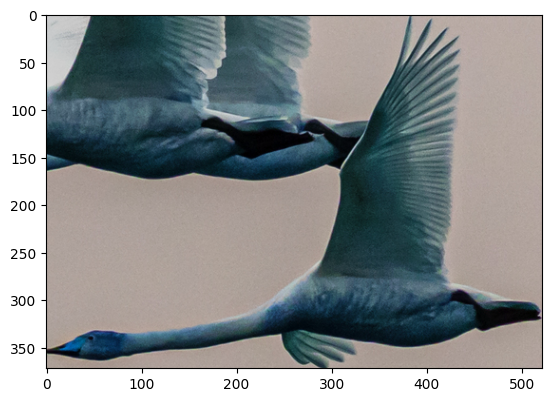

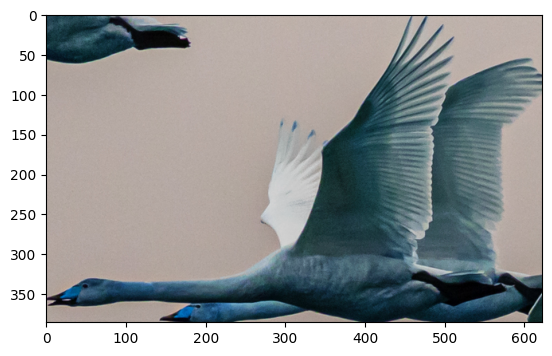

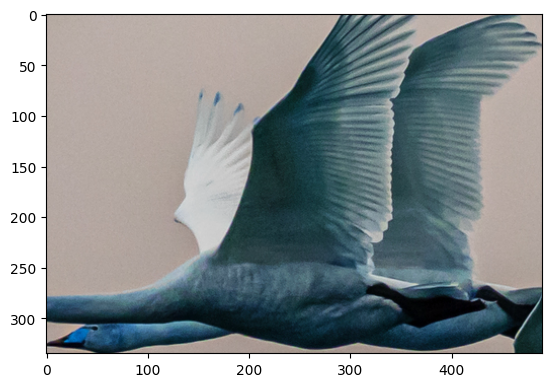

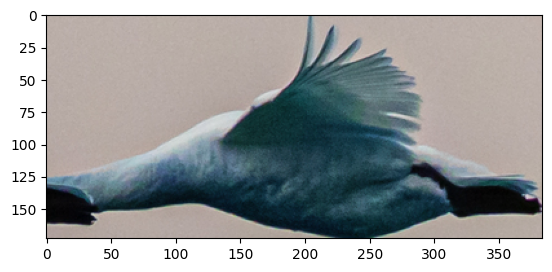

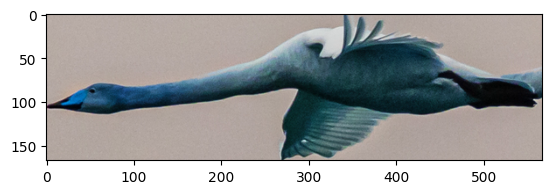

In [110]:
swans_intensities = np.unique(mask)
swans_intensities = swans_intensities[swans_intensities != 0]

for itensity in swans_intensities:
    swan_mask = np.array(mask == itensity, dtype = int)
    ids = np.where(mask == itensity)
    
    min_row, max_row = np.min(ids[0]) , np.max(ids[0])
    min_col, max_col = np.min(ids[1]) , np.max(ids[1])
    plt.figure()
    plt.imshow(img[min_row:max_row, min_col:max_col])